<a href="https://colab.research.google.com/github/FranciscoFoz/gradiente-descendente-bibliotecario-cienciadedados/blob/main/Notebook/Gradiente_e_descendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen> Bibliotecário em ciência de dados: Gradiente e descendente </font>


Este notebook faz parte de um projeto de leitura do livro "Data Science do zero" de Joel Grus. 

Como forma de aprendizado, realizei a leitura e pesquisa dos conceitos apresentados no capítulo 8 do livro.


---


## <font color= MediumSpringGreen> Projeto </font>

Uma biblioteca gostaria de prever a quantidade de visitas mensais que ela terá.
A direção da biblioteca deduz que quanto maior o número de eventos realizados durante o mês, maior a quantidade de visitas a biblioteca.

Será que existe uma relação entre elas? 

**Se existir, será possível prever a quantidade de visitas pela quantidade de eventos?**


### <font color= MediumSpringGreen> Modelos

Realizarei a previsão utilizando o modelo de regressão linear, comparando os dois métodos:

* Método dos mínimos quadradros
* Gradiente e descendente

## <font color= MediumSpringGreen> Importando bibliotecas </font>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn  as sns

import statsmodels.api as sm 

import imageio


sns.set_style("darkgrid")

## <font color= MediumSpringGreen> Importando dados </font>

In [ ]:
eventos_biblioteca = pd.read_csv('eventos_visitas_biblioteca.csv')
eventos_biblioteca

## <font color= MediumSpringGreen> Visualizando dados e sua correlação </font>

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='quantidade_eventos',y='visitas',data=eventos_biblioteca)
ax.set_title('Distribuição de Visitas X Eventos realizados',fontsize=16)
ax.set_xlabel('Eventos')
ax.set_ylabel('Visitas')
ax=ax

In [ ]:
plt.figure(figsize = (8,8))
sns.set(font_scale=1.06)

ax = sns.heatmap(eventos_biblioteca.corr(), annot=True, fmt=".3f",cmap='Blues_r',
                 xticklabels=(['Eventos','Visitas']),
                 yticklabels=(['Eventos','Visitas']))
ax.set_title('Correlação entre as variáveis\n Visitas X Eventos\n', fontsize=14)
ax.xaxis.tick_top()

In [ ]:
ax = sns.jointplot(x='quantidade_eventos',y='visitas',data=eventos_biblioteca,
                   kind='reg',height=10,truncate=False)


Podemos observar uma forte correlação entre as duas variáveis além delas se distribuírem como uma normal.

Para isso, verificarei as métricas da regressão para entender se há de fato a possibilidade de predição com esses dados.

In [ ]:
X = eventos_biblioteca['quantidade_eventos']
Y = sm.add_constant(eventos_biblioteca['visitas'])
OLS = sm.OLS(X,Y).fit()
print(OLS.summary())

O teste T teve um valor diferente de 0, portanto podemos considerar que as a quantidade de eventos tem um impacto significativo na quantidade de visitas.

O valor p está zerado, portanto a probabilidade da quantidade de eventos não ter um impacto significativo é praticamente nula.

O teste de Omnibus, está próximo de 0, portanto a distribuição pode ser considerada como uma normal.


Diante desses resultados, agora realizarei os cálculos da regressão.

## <font color= MediumSpringGreen> Método dos mínimos quadrados </font>

"*O método dos mínimos quadrados  é uma técnica que (...) minimiza a soma dos quadrados dos erros obtidos na aproximação.*"

Fonte: https://www.ufrgs.br/reamat/AlgebraLinear/livro/s14-mx00e9todo_dos_mx00ednimos_quadrados.html

A equação da reta é $${Y = mX + b}$$


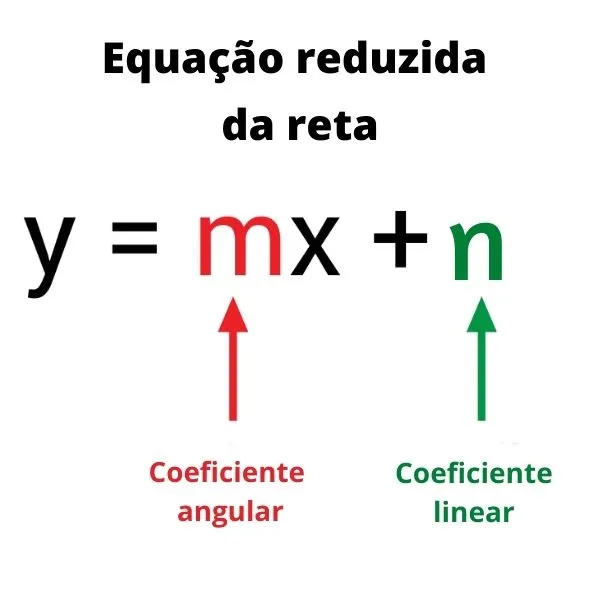

FONTE: https://mundoeducacao.uol.com.br/matematica/equacao-reduzida-reta.htm



Já tenho os valores de X e Y, para encontrar os valores de m e b, precisarei realizar essa fórmula:


* "*a é igual a m*"


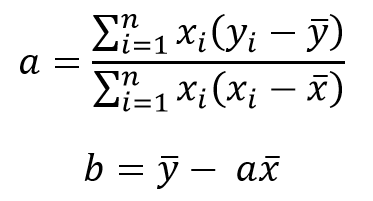

In [ ]:
# Criando função da reta de regressão
def regressao(x,m,b):
  return m*x + b

#Criando cópia do dataset
eventos_biblioteca_SSE = eventos_biblioteca.copy()

Verificando valores de m e b:

In [ ]:
eventos_biblioteca_SSE['(x_i - x_media)'] = eventos_biblioteca_SSE['quantidade_eventos'] - eventos_biblioteca_SSE['quantidade_eventos'].mean()
eventos_biblioteca_SSE['(y_i - y_media)'] = eventos_biblioteca_SSE['visitas'] - eventos_biblioteca_SSE['visitas'].mean()
eventos_biblioteca_SSE['(x_i - x_media)(y_i - y_media)'] = eventos_biblioteca_SSE['(x_i - x_media)'] * eventos_biblioteca_SSE['(y_i - y_media)']
eventos_biblioteca_SSE['(x_i - x_media)^2'] = (eventos_biblioteca_SSE['quantidade_eventos'] - eventos_biblioteca_SSE['quantidade_eventos'].mean())**2

m = (sum(eventos_biblioteca_SSE['(x_i - x_media)'] * eventos_biblioteca_SSE['(y_i - y_media)'])) / sum(eventos_biblioteca_SSE['(x_i - x_media)^2'])
b = eventos_biblioteca_SSE['visitas'].mean() - (m * eventos_biblioteca_SSE['quantidade_eventos'].mean())

print(f"Coeficiente angular (m):{m}\nCoeficiente linear(b): {b}")

In [ ]:
eventos_biblioteca_SSE

In [ ]:
X = eventos_biblioteca['quantidade_eventos']
Y = eventos_biblioteca['visitas']

#Plotando gráfico
fig = plt.figure(figsize=(10,8))
plt.scatter(X,Y)
plt.xlabel('Eventos')
plt.ylabel('Visitas')
plt.title(f'Regressão linear entre:\nQuantidade de eventos X Visitas a biblioteca\n\nm={m} | b={b}',fontsize=16)

#Plotando reta
reta = plt.plot(X,regressao(X,m,b),c='darkorange')

plt.show()
    

Certo, agora verificarei qual é o custo de erro dessa equação para entender se são os melhores valores em comparação com o outro modelo.

In [ ]:
#Variáveis da equação
m = 5.118354886164699
b = 673.6614706928174
X = eventos_biblioteca['quantidade_eventos']
Y = eventos_biblioteca['visitas']

#Gerando equação de previsão
y_pred = regressao(X,m,b)

#Vericando custo
custo_SSE = np.sum((y_pred - Y)**2)

print(custo_SSE)

## <font color= MediumSpringGreen> Método do gradiente e descendente </font>

"Gradiente descendente é um dos algoritmos de maior sucesso em problemas de Machine Learning. O método consiste em encontrar, de forma iterativa, os valores dos parâmetros que minimizam determinada função de interesse."

FONTE: http://cursos.leg.ufpr.br/ML4all/apoio/Gradiente.html

Para encontrar os melhores valores de m e b, a partir de um valor aleatório inserido na equação:
$$ Y = mX + B$$

Precisarei diminuir ou aumentar o valor de m e b de acordo onde estão na função de m pelo custo dela e de b pelo custo dela.


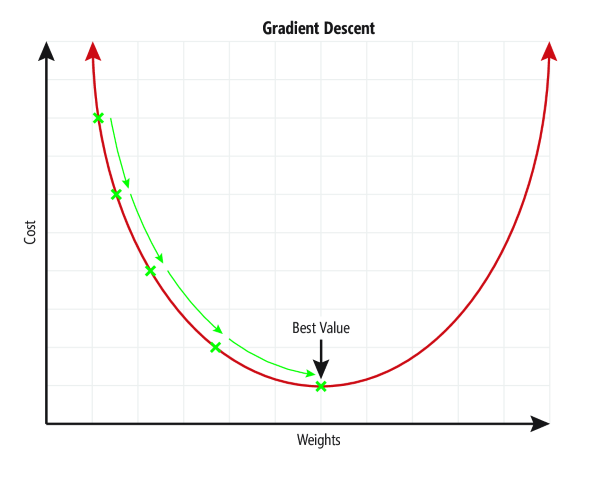

FONTE: https://learn.microsoft.com/pt-br/archive/msdn-magazine/2019/april/artificially-intelligent-how-do-neural-networks-learn

Se o melhor valor é 5 para m e inseri o valor de -2, precisarei: 
* Verificar o custo da equação para o valor de -2;
* Derivar esse valor;
* Multiplicar pela constante (learning rate: taxa de aprendizado que irá "normalizar" os números para que possam estar na mesma ordem de grandeza)
* Subtrair do valor anterior de m
* Refazer novamente até encontrar o menor valor de custo.

Realizo esse mesmo procedimento para o b.

Fiz essa função que retornará os valores de m,b,custo, R2 e um DataFrame com o histórico de cada iteração para posteriormente verificar a curva de aprendizado.

In [ ]:
def gradiente_descendente_regressao(X,Y,m,b,learning_rate_b,learning_rate_m,n_iters):
  '''
  Essa função tem como objetivo treinar um modelo iterativo para encontrar 
  os melhores valores do coeficiente angular (m) e coeficiente linear (b), 
  para a equação da reta de regressão:

  "Y = mX + b"
  
  Input:

  X = variável dependente
  Y = Variável independente
  m = coeficiente angular
  b = coeficiente linear
  learning_rate_m = Taxa de aprendizado do coenficiente angular
  learning_rate_b = Taxa de aprendizado do coeficiente linear
  n_iters = Número de iterações que será realizado para encontrar os melhores valores
  
  Output:
  
  df_historico_iteracoes = Pandas DataFrame com o historico de m,b e custo de cada iteração realizada

  '''

  #Gerando equação
  y_pred = regressao(X,m,b)

  #Variáveis de custo
  custo_GD = sum((y_pred - Y)**2)
  SQT = sum((Y - Y.mean())**2)

  #listas das métricas
  lista_m = []
  lista_b = []
  lista_custo_GD = []
  lista_previsao = []

  #Laço de iterações de atualização dos valores de m e b de acordo com os valores de x
  for i in range(1,n_iters):

      derivada_m = sum(2 * X * (y_pred - Y))
      derivada_b = sum(2 * (y_pred - Y))

      m = m - (derivada_m * learning_rate_m)
      b = b - (derivada_b * learning_rate_b)

      y_pred = regressao(X,m,b)
      custo_GD = np.sum((y_pred - Y)**2)

      lista_m.append(m)
      lista_b.append(b)
      lista_custo_GD.append(custo_GD)
      lista_previsao.append(y_pred)


  R2 = (SQT - custo_GD)/SQT

  df_historico_iteracoes = pd.DataFrame({'m': lista_m,
                                          'b': lista_b,
                                          'custo':lista_custo_GD})
  
  print(f'Coeficiente angular (m): {m}\nCoeficiente linear (b): {b}\nCusto: {custo_GD}\nR2: {R2}')
  return df_historico_iteracoes

In [ ]:
X = eventos_biblioteca['quantidade_eventos']
Y = eventos_biblioteca['visitas']
m = -2
b = 100

#Melhores valores encontrados
learning_rate_b = 0.0001
learning_rate_m = 0.0000001
n_iters = 3000

historico_iteracoes = gradiente_descendente_regressao(X,Y,m,b,learning_rate_b,learning_rate_m,n_iters)

In [ ]:
historico_iteracoes


Será que o custo do gradiente e descendente foi menor do que o do Método dos mínimos quadrados?

In [ ]:
custo_GD = 1247563.6085987508

In [ ]:
custo_GD < custo_SSE

In [ ]:
custo_SSE - custo_GD

In [ ]:
custo_SSE

In [ ]:
custo_GD

Ele foi por 0.0000000002, praticamente igual o valor.



### <font color= MediumSpringGreen> Visualizando descida do gradiente </font>

Se plotar a variação de m e b pelo custo conseguiremos visualizar como os valores foram descendo a cada iteração.

*Criei uma taxa de custo (1:10.000) para visualizarmos melhor na ordem das grandezas.*

In [ ]:
historico_iteracoes


In [ ]:
historico_iteracoes['Taxa de custo: 1:10.000'] = historico_iteracoes['custo'] *0.00001

In [ ]:
historico_iteracoes.plot(x='b',y='Taxa de custo: 1:10.000',figsize=(10,8))
plt.title('Taxa de custo X b',fontsize=16)
plt.xlabel('b')
plt.ylabel('Taxa de custo')
plt.show()


Podemos visualizar o valor de b aumentando para se encontrar o menor valor de custo.

In [ ]:
historico_iteracoes.plot(x='m',y='Taxa de custo: 1:10.000',figsize=(10,8))
plt.title('Taxa de custo X m',fontsize=16)
plt.xlabel('m')
plt.ylabel('Taxa de custo')
plt.show()


Também podemos ver o valor de aumentando enquanto a taxa de custo diminui. Nesse caso, conseguimos visualizar que quando quase atingiu o valor de 10, precisou começar a diminuir para descer ainda mais o gradiente do custo.

Isso porque o custo também dependia do b.

In [ ]:
plt.figure(figsize=(10,8))
ax = historico_iteracoes['Taxa de custo: 1:10.000'].plot(y='Taxa de custo: 1:10.000',
                                                        legend=True)
ax.set_title('Taxa de custo X Iterações',fontsize=16)
ax.set_xlabel('Iterações')
ax.set_ylabel('Taxa de custo')
ax=ax


Podemos visualizar aqui a taxa de custo pela quantidade de iterações.

Os ajustes em m e b são muito sensíveis e grande parte do custo diminui logo nas primeiras iterações.

Como podemos visualizar quando olhamos para apenas as 100 primeiras:

In [ ]:
plt.figure(figsize=(10,8))
ax = historico_iteracoes['Taxa de custo: 1:10.000'][:100].plot(y='Taxa de custo: 1:10.000',
                                                        legend=True)
ax.set_title('Taxa de custo X Iterações',fontsize=16)
ax.set_xlabel('Iterações')
ax.set_ylabel('Taxa de custo')
ax=ax

E para as 10 primeiras:

In [ ]:
plt.figure(figsize=(10,8))
ax = historico_iteracoes['Taxa de custo: 1:10.000'][:10].plot(y='Taxa de custo: 1:10.000',
                                                        legend=True)
ax.set_title('Taxa de custo X Iterações',fontsize=16)
ax.set_xlabel('Iterações')
ax.set_ylabel('Taxa de custo')
ax=ax

#### <font color= MediumSpringGreen> Salvando 500 primeiras iterações para criar um gif animado para ilustrar o ajuste </font>

In [ ]:
m = -2
b = 100
learning_rate_b = 0.0001
learning_rate_m = 0.0000001

for i in range(1,500):

  #Plotando gráfico
  fig = plt.figure(figsize=(6,6))
  plt.scatter(X,Y)
  plt.xlabel('Eventos')
  plt.ylabel('Visitas')
  plt.title(f'Iteração número:{i}\nM={m} e B={b}',fontsize=14)
  
  #Plotando reta
  reta = plt.plot(X,y_pred,c='darkorange')
  
  #Salvando o gráfico
  plt.savefig(f"graficos/interacao_{i}.png",dpi=300,quality=95)
  plt.close(fig)
  

  derivada_m = sum(2 * X * (y_pred - Y))
  derivada_b = sum(2 * (y_pred - Y))
  m = m - (derivada_m * learning_rate_m)
  b = b - (derivada_b * learning_rate_b)

  y_pred = regressao(X,m,b)
  custo_GD = np.sum((y_pred - Y)**2)
    

In [ ]:
frames = []
for i in range(1,500):
    image = imageio.imread(f'./graficos/interacao_{i}.png')
    frames.append(image)

In [ ]:
imageio.mimsave('./gradiente_descendente.gif',
                frames,
                fps = 50)

## <font color= MediumSpringGreen> Previsão da quantidade de visitas da biblioteca </font>

In [ ]:
m = 5.11835488616479
b = 673.6614706928144

def previsao_visitas(X):
  '''
  Essa função irá prever a quantidade de visitas a biblioteca baseado 
  na quantidade de eventos realizados mensalmente.

  Input:
  X = Quantidade de eventos
  
  Output:
  Quantidade visitas estimadas.
  '''

  m = 5.11835488616479
  b = 673.6614706928144

  previsao = round(X*m + b)
  
  return previsao


In [ ]:
previsao_visitas(10)

Caso haja 10 eventos é possível que haja uma média de 725 visitas mensais a biblioteca.

In [ ]:
previsao_visitas(10) - y_predicao.std()

In [ ]:
previsao_visitas(10) + y_predicao.std()

## <font color= MediumSpringGreen> Considerações finais </font>

O modelo do gradiente e descendente se mostrou praticamente igual ao modelo do método dos mínimos quadrados, mas utilizando mais gasto computacional devido as iterações.

Para uma regressão linear simples esse talvez não seja o melhor método para prever o valor, entretanto ele pode ser um poderoso algoritmo quando se tem outras variáveis ou mesmo demais dimensões. 

### <font color= MediumSpringGreen> Fontes consultadas para a elaboração do projeto </font>


* [Capítulo 8 do Livro "Data Science do Zero"](https://www.amazon.com.br/Data-Science-zero-Joel-Grus/dp/857608998X)
* [Curso Alura - Estatística com Python:
Correlação e Regressão](https://www.alura.com.br/curso-online-estatistica-correlacao-regressao)
* [Curso Alura - Regressão linear:
testando relações e prevendo resultados](https://www.alura.com.br/curso-online-data-science-modelo-regressao-linear)
* [Curso de Inteligência Artificial para todos - Diogo Cortiz](https://youtube.com/playlist?list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY)
* [Gradiente descendente
Laboratório de Estatística e Geoinformação - LEG/UFPR](http://cursos.leg.ufpr.br/ML4all/apoio/Gradiente.html#exemplo_simulado)
* [Matemática para Machine Learning](https://youtube.com/playlist?list=PLyqOvdQmGdTTYHKdxWRmt8oOhMwYhmxkM)
* [Regressão Linear e Gradiente Descendente: Do zero à Bruxaria - Rodrigo Leite](https://drigols.medium.com/regress%C3%A3o-linear-e-gradiente-descendente-do-zero-a-bruxaria-c4d1484357e0)
